In [1]:
import sys; sys.path.append('../')

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Shapelets

In [3]:
sns.set_palette('colorblind')

In [9]:
# Data loc
save_dir = '../experiments/results/pendigits_shapelets'

In [111]:
# Load data
shapelets = torch.load(save_dir + '/old_50/shapelets.pt')
lengths = torch.load(save_dir + '/old_50/lengths.pt')
minimizers = torch.load(save_dir + '/old_50/minimizers.pt')

In [112]:
# To map index to 0 to 9
class_map = torch.argsort(torch.Tensor([8, 2, 1, 4, 6, 0, 5, 9, 7, 3]))

In [113]:
# Remap
shapelets = shapelets[class_map]
lengths = lengths[class_map]
minimizers = minimizers[class_map]

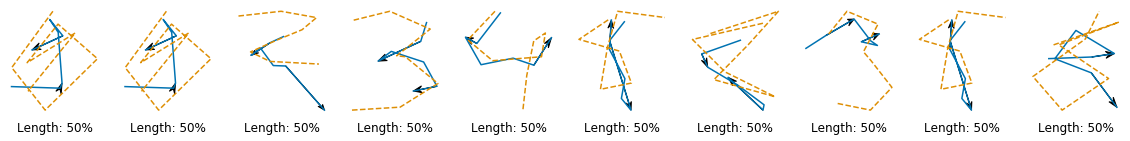

In [114]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    shapelet, minimizer, length = shapelets[i], minimizers[i], lengths[i]
    ax[i].plot(shapelet[:, 0], shapelet[:, 1], label='Learnt shapelet')
    ax[i].plot(minimizer[:, 0], minimizer[:, 1], label='Training set minimizer', ls='--')
    
    # Add an arrow
    xdata, ydata = shapelet[:, 0], shapelet[:, 1]
    arw_i = 3   # Start index of the arrow
    for arw_i in [1, 5]:
        ax[i].arrow(xdata[arw_i], ydata[arw_i], xdata[arw_i+1]-xdata[arw_i], ydata[arw_i+1]-ydata[arw_i], 
                 length_includes_head=True, head_width=0.2, color='black', overhang=0.4)
    
    ax[i].set_title('Length: {:.0f}%'.format(100 * length / 7), y=-0.2)
    
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].axis('off')

plt.savefig('../paper/images/pendigits/old_shapelets_noborder.png', dpi=300, bbox_inches='tight')

# Speech Commands

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [71]:
# Data loc
save_dir = '../experiments/results/speech_commands_shapelets'

In [192]:
# Load data
shapelets = torch.load(save_dir + '/shapelets.pt')
shapelet_times_full = torch.load(save_dir + '/shapelet_times.pt')
minimizers = torch.load(save_dir + '/minimizers.pt')
minimizer_times_full = torch.load(save_dir + '/minimizer_times.pt')
lengths = torch.load(save_dir + '/lengths.pt')

# Single sample
idx = 0
shapelet = shapelets[idx][:, 0:10]
shapelet_times = shapelet_times[idx]
minimizer = minimizers[idx][:, 0:10]
minimizer_times = minimizer_times[idx]
length = lengths[0]

In [141]:
# Subset the minimizer to the shapelet times
subset_bool = (minimizer_times >= shapelet_times[0]) & (minimizer_times <= shapelet_times[-1])
subset_times = minimizer_times[subset_bool]
minimizer_subset = minimizer[subset_bool]

delta = minimizer_subset - shapelet

In [142]:
# # TODO: Normalise the columns
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1, 1))
# data = torch.cat((shapelet, minimizer_subset), 0)
# data_scaled = scaler.fit_transform(data)
# shapelet, minimizer_subset = data_scaled[:int(data.shape[0] / 2)], data_scaled[int(data.shape[0] / 2):]

In [143]:
# Compute delta
delta = shapelet - minimizer_subset

In [144]:
vmin = min(shapelet.min(), minimizer_subset.min())
vmax = max(shapelet.max(), minimizer_subset.max())

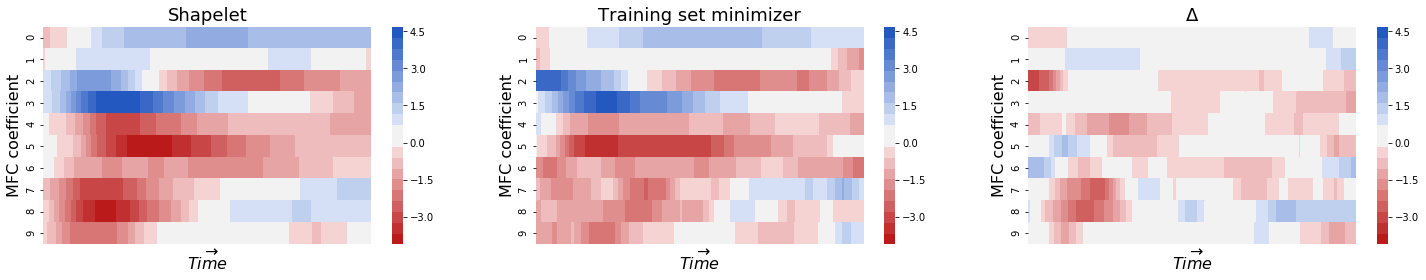

In [177]:
fig, ax = plt.subplots(1, 3, figsize=(25, 4))
cmap = sns.diverging_palette(12.2, 258.6, n=20, sep=14, s=90, l=40)
sns.heatmap(shapelet.T, ax=ax[0], cmap=cmap, vmin=vmin, vmax=vmax)
sns.heatmap(minimizer_subset.T, ax=ax[1], cmap=cmap, vmin=vmin, vmax=vmax)
sns.heatmap(delta.T, ax=ax[2], cmap=cmap, vmin=vmin, vmax=vmax)

ax[0].set_title('Shapelet', fontsize=18)
ax[1].set_title('Training set minimizer', fontsize=18)
ax[2].set_title('$\Delta$', fontsize=18)

ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

ax[0].set_xlabel('$\overrightarrow{ Time }$', fontsize=16)
ax[1].set_xlabel('$\overrightarrow{ Time }$', fontsize=16)
ax[2].set_xlabel('$\overrightarrow{ Time }$', fontsize=16)

ax[0].set_ylabel('MFC coefficient', fontsize=16)
ax[1].set_ylabel('MFC coefficient', fontsize=16)
ax[2].set_ylabel('MFC coefficient', fontsize=16)

plt.savefig('../paper/images/old_speech_commands_heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(4, 10, figsize=(25, 10))
ax = ax.ravel()

shapelet = shapelets[0]
minimizer = minimizers[0]
shapelet_times = shapelet_times_full[0]
minimizer_times = minimizer_times_full[0]
minimizer_subset = minimizer[subset_bool]

for i in range(shapelet.shape[1]):
    ax[i].plot(shapelet_times, shapelet[:, i])
    ax[i].plot(shapelet_times, minimizer_subset[:, i], ls='--')
    ax[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax[i].tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)

plt.savefig('../paper/images/new_speech_commands_axisplots.png', dpi=300, bbox_inches='tight') 

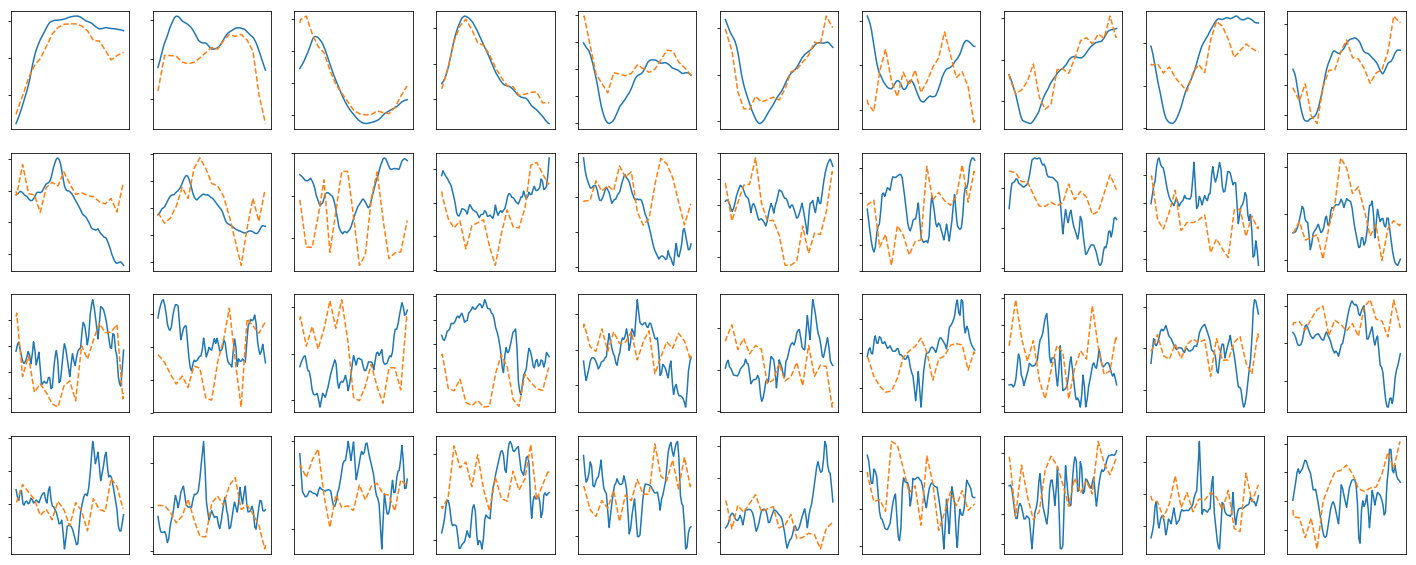